In [169]:
!pip install opendatasets

In [170]:
import opendatasets as od
import pandas

In [171]:
od.download('https://www.kaggle.com/datasets/khoongweihao/covid19-xray-dataset-train-test-sets/code')

Skipping, found downloaded files in "./covid19-xray-dataset-train-test-sets" (use force=True to force download)


In [172]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,MaxPooling2D,Conv2D

In [173]:
train_ds = keras.utils.image_dataset_from_directory(
    '/content/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (224,224)
)

test_ds = keras.utils.image_dataset_from_directory(
    '/content/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (224,224)
)

# Add rescaling to the datasets
def preprocess(image, label):
  image = image / 255.0
  return image, label

train_ds = train_ds.map(preprocess)
test_ds = test_ds.map(preprocess)

Found 148 files belonging to 2 classes.
Found 40 files belonging to 2 classes.


In [174]:
model = keras.Sequential([
       keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
       keras.layers.MaxPooling2D((2, 2)),
       keras.layers.Conv2D(64, (3, 3), activation='relu'),
       keras.layers.MaxPooling2D((2, 2)),
       keras.layers.Conv2D(128, (3, 3), activation='relu'),
       keras.layers.MaxPooling2D((2, 2)),
       keras.layers.Conv2D(256, (3, 3), activation='relu'),
       keras.layers.MaxPooling2D((2, 2)),
       keras.layers.Flatten(),
       keras.layers.Dense(256,activation='relu'),
       keras.layers.Dropout(0.4),
       keras.layers.Dense(1, activation='sigmoid')
   ])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 256)            │     9,437,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,826,113 (37.48 MB)

 Trainable params: 9,826,113 (37.48 MB)

 Non-trainable params: 0 (0.00 B)

In [175]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [177]:
history = model.fit(
        train_ds,
        epochs=10,
        validation_data=test_ds)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 548ms/step - accuracy: 0.9555 - loss: 0.1147 - val_accuracy: 1.0000 - val_loss: 0.0395
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 514ms/step - accuracy: 0.9836 - loss: 0.0701 - val_accuracy: 1.0000 - val_loss: 0.0145
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 680ms/step - accuracy: 0.9790 - loss: 0.0495 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 485ms/step - accuracy: 0.9798 - loss: 0.0417 - val_accuracy: 1.0000 - val_loss: 0.0175
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 544ms/step - accuracy: 1.0000 - loss: 0.0343 - val_accuracy: 1.0000 - val_loss: 0.0151
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 749ms/step - accuracy: 0.9623 - loss: 0.0926 - val_accuracy: 1.0000 - val_loss: 0.0050
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 502ms/step - accuracy: 0.9737 - loss: 0.0399 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 460ms/step - accuracy: 0.9702 - loss: 0.0939 - val_accuracy: 1.0000 - val_loss:

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

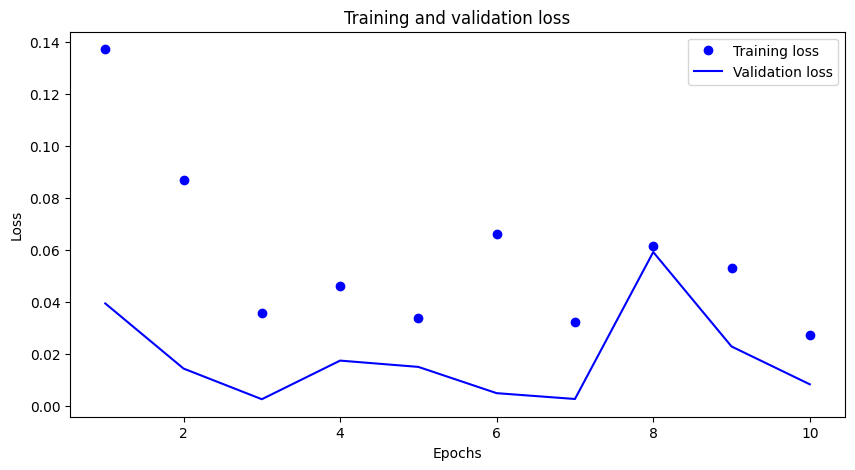

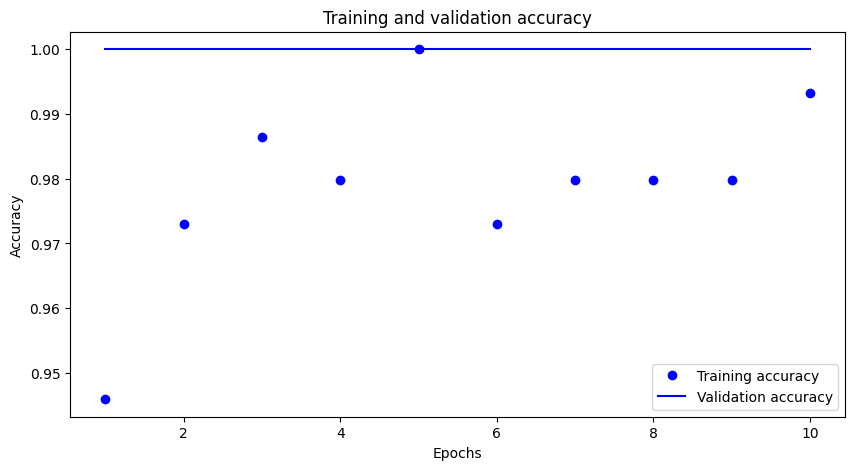

In [178]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()